## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()



,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows.")

there are 3 columns and 1991 rows.


**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2398
TAG      2398
POSTS    2398
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,41894
c,390871
c#,1573377
c++,784511
delphi,50385
go,66457
java,1878859
javascript,2457754
perl,67377


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,173,173
c,173,173
c#,174,174
c++,173,173
delphi,173,173
go,158,158
java,173,173
javascript,173,173
perl,173,173


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df["DATE"][1]

'2008-08-01 00:00:00'

In [ ]:
df.DATE[1]

'2008-08-01 00:00:00'

In [ ]:
# pd.to_datetime(df["DATE"][1])
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1643.0,754.0,104.0,NaN,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,177.0,1505.0,6331.0,3240.0,133.0,852.0,6528.0,15555.0,118.0,3764.0,21925.0,4340.0,476.0,1743.0
2022-09-01,191.0,1646.0,5735.0,3086.0,148.0,842.0,6251.0,14284.0,82.0,3386.0,20199.0,4023.0,474.0,1801.0
2022-10-01,242.0,2012.0,5813.0,3218.0,153.0,741.0,6513.0,14108.0,82.0,3380.0,22092.0,4529.0,436.0,1635.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
f"The reshaped_df has {reshaped_df.shape[0]} rows and {reshaped_df.shape[1]} columns."

'The reshaped_df has 174 rows and 14 columns.'

In [ ]:
reshaped_df.head()
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-08-01,177.0,1505.0,6331.0,3240.0,133.0,852.0,6528.0,15555.0,118.0,3764.0,21925.0,4340.0,476.0,1743.0
2022-09-01,191.0,1646.0,5735.0,3086.0,148.0,842.0,6251.0,14284.0,82.0,3386.0,20199.0,4023.0,474.0,1801.0
2022-10-01,242.0,2012.0,5813.0,3218.0,153.0,741.0,6513.0,14108.0,82.0,3380.0,22092.0,4529.0,436.0,1635.0
2022-11-01,288.0,2192.0,6070.0,3330.0,116.0,753.0,6830.0,14428.0,110.0,3382.0,22989.0,4645.0,467.0,1689.0
2022-12-01,288.0,1886.0,5406.0,2919.0,87.0,642.0,6092.0,12769.0,96.0,2974.0,19642.0,3715.0,400.0,1489.0


In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.isna().values.any()

False

In [ ]:
reshaped_df.count()

TAG
assembly      174
c             174
c#            174
c++           174
delphi        174
go            174
java          174
javascript    174
perl          174
php           174
python        174
r             174
ruby          174
swift         174
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

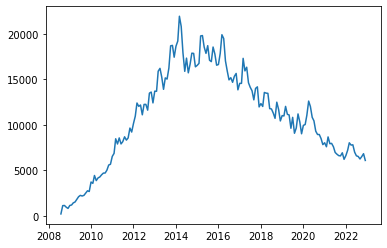

In [ ]:
plt.plot(reshaped_df.index, reshaped_df.java)

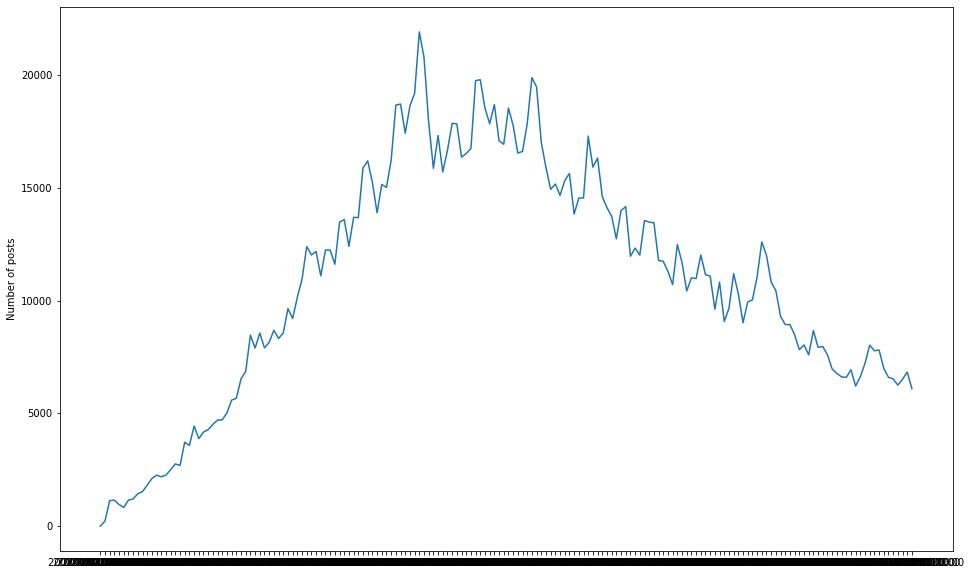

In [ ]:
plt.figure(figsize=(16, 10))
plt.ylabel("Number of posts")
plt.plot(reshaped_df.index, reshaped_df.java)

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

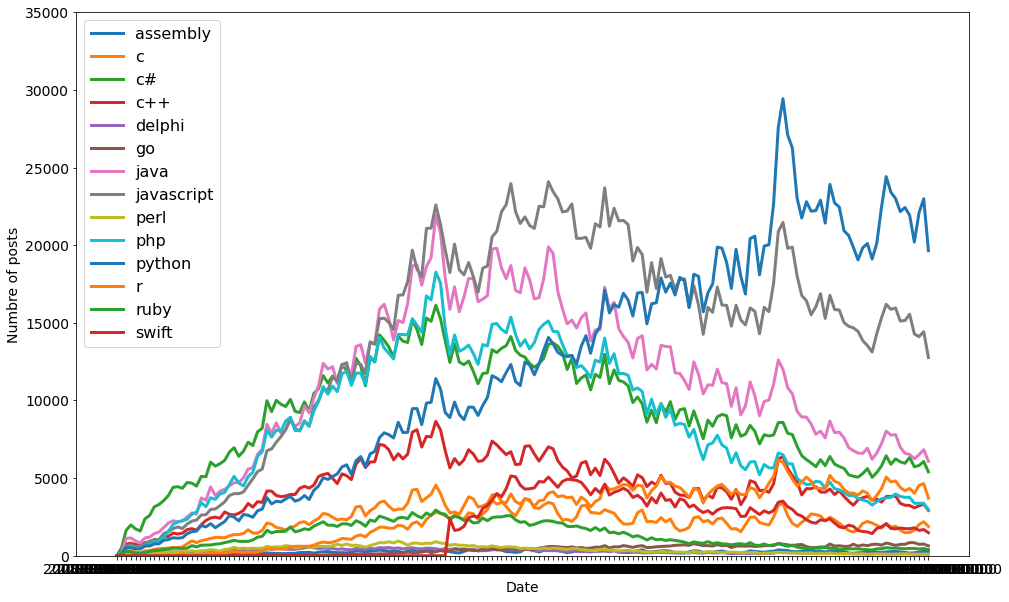

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Numbre of posts", fontsize=14)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

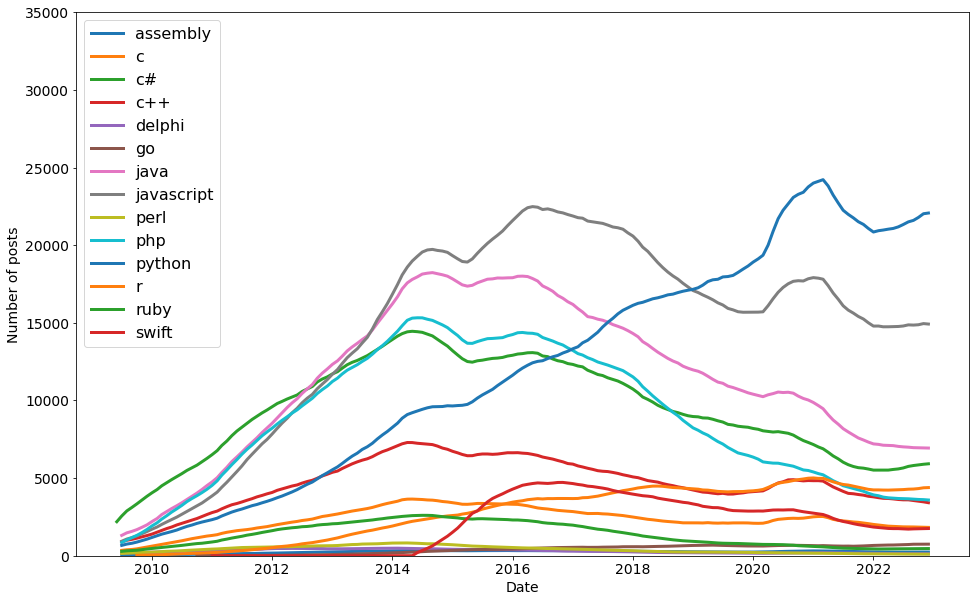

In [ ]:
roll_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)